# Using Machine Learning Tools: Assignment 1

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of predicting bike rental demand. A data set has been provided containing records of bike rentals in Seoul, collected during 2017-18.

The scenario for this assignment is that you are a new employee of a company (that rents bikes, alongside other activities) and you have been assigned the task of predicting the bike rentals. Your line manager has given you some instructions (those shown below) but is expecting you to be able to do this task without close supervision and to report back with understandable and concise text, graphics and code (and of course the company wants a copy of all the code required to perform this task). Naturally, you are wanting to show that you are a valuable member of the company and although the company allows the use of ChatGPT, you will want to show that you are making useful contributions and that you bring value to the company beyond just being able to type instructions into ChatGPT, as otherwise the company might replace you with a cheaper data entry employee. Hence, you should use ChatGPT whenever you like (or whenever instructed to - see later) but do highlight how your own knowledge and judgement makes a contribution.

The main aims of this assignment are: 

- to practice using tools for loading and viewing data sets;
- to check data for common pitfalls and clean it up;
- to plan a simple experiment and prepare the data accordingly;
- to run your experiment and to report and interpret your results clearly and concisely.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task. Some questions require writing code, some require graphical results, and some require short comments or analysis as text. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (with the correct results displayed) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code is written to be able to be run correctly on the original data file.

When creating graphical output, label is clearly, with appropriate titles, xlabels and ylabels, as appropriate.

Most of the tasks in this assignment only require writing a few lines of code! One goal of the assignment is explore [sklearn](https://scikit-learn.org/stable/index.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), [matplotlib](https://matplotlib.org/stable/index.html) and other libraries you will find useful throughout the course, so feel free to use the functions they provide. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

Chapter 2 of the reference book is based on a similar workflow to this prac, so you may look there for some further background and ideas. You can also use any other general resources on the internet that are relevant, including ChatGPT, although do not use someone else's code or answers that directly relate to these questions. If you take a large portion of code or text from the internet or ChatGPT then you should reference where this was taken from, but we do not expect any references for small pieces of code, such as from documentation, blogs or tutorials. Taking, and adapting, small portions of code is expected and is common practice when solving real problems.

The following code imports some of the essential libraries that you will need. You should not need to modify it, but you are expected to import other libraries as needed.


In [1]:
# Python ≥3.5 is required
import sys
# from statistics import LinearRegression

assert sys.version_info >= (3, 5)

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import root_mean_squared_error
assert sklearn.__version__ >= "0.20"

import pandas as pd
assert pd.__version__ >= "1.0"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
# set seed
np.random.seed(42)

## Loading and initial processing of the dataset (40%)

Download the data set `SeoulBikeData.csv` **from MyUni** using the link provided on the assignment page. 

The data is stored in a CSV (comma separated values) file and contains the following information 

 - Date: year-month-day
 - Rented Bike Count: Count of bikes rented at each hour
 - Hour: Hour of the day
 - Temperature: Temperature in degrees Celsius
 - Humidity: %
 - Windspeed: m/s
 - Visibility: 10m
 - Dew point temperature: degrees Celsius
 - Solar radiation: MJ/m2
 - Rainfall: mm
 - Snowfall: cm
 - Seasons: Winter, Spring, Summer, Autumn
 - Holiday: Holiday/No holiday
 - Functional Day: NoFunc(Non Functional Hours), Fun(Functional hours)

### Load and visualise the data

**Load the data set from the csv file into a DataFrame, summarise it in text using one pandas function, and then visualise each feature with one type of plot (this can be different for each feature).**

#### Loading in the data

In [3]:
### Your code here
# Load the data set from the csv file into a DataFrame
df = pd.read_csv(os.getcwd() + '/Assignment 1/SeoulBikeData.csv')

In [4]:
# inspect data-types and check for missing data in the data frame
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature (C)            8760 non-null   float64
 4   Humidity (%)               8760 non-null   float64
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature (C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   object 
 9   Rainfall(mm)               8760 non-null   object 
 10  Snowfall (cm)              8760 non-null   object 
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

None

In [5]:
# high-level summary of features
display(df.describe())

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,714.876027,11.500000,12.945765,58.268014,1.848950,1436.825799,4.073813
std,1160.468927,6.922582,12.376168,20.807845,10.665215,608.298712,13.060369
min,0.000000,0.000000,-17.800000,-2.200000,-0.700000,27.000000,-30.600000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000
75%,1066.000000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000
max,90997.000000,23.000000,195.000000,455.000000,991.100000,2000.000000,27.200000


However, we notice that not all columns are featured in describe since describe defaults to the continuous values (numerical). We can inspect the rest by seperating the categorical and numerical features

In [6]:
# categorical features 
# we assume features not included in the describe table above is categorical
# notice how it matches with the features with the object data type
cat_features = set(df.columns).difference(set(df.describe().columns))
print(cat_features)

{'Functioning Day', 'Seasons', 'Rainfall(mm)', 'Date', 'Holiday', 'Solar Radiation (MJ/m2)', 'Snowfall (cm)'}


In [7]:
display(df[list(cat_features)].describe())

,Functioning Day,Seasons,Rainfall(mm),Date,Holiday,Solar Radiation (MJ/m2),Snowfall (cm)
count,8760,8760,8760,8760,8760,8760,8760
unique,2,4,62,365,2,347,54
top,Yes,Spring,0,01/12/2017,No Holiday,0,0
freq,8465,2208,8211,24,8328,4300,8295


However, it can be observed that Solar Radiation, Rainfall and Snowfall, which are implied to be numerical features given their measurements are listed in categorical features. We inspect the values to see why this is the reason.

In [8]:
solar_col = df["Solar Radiation (MJ/m2)"]
# check if there exists data that is not numerical or decimal:
# which might explain why the data type is parsed as categorical
solar_col[~(solar_col.apply(lambda x: x.replace('.','')).apply(str.isdigit))]

4070    w.39
Name: Solar Radiation (MJ/m2), dtype: object

We can observe that these numerical columns have some dirty data that is non-numerical which is the reason why pandas does not recognize them as numerical features.

#### Visualizing the data without cleaning

Show the distribution of each numerical feature using a box plot:

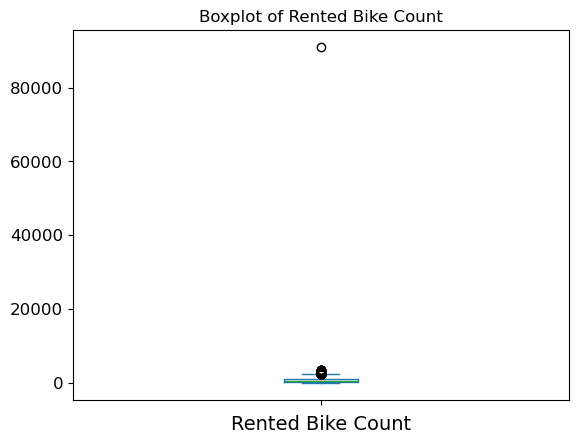

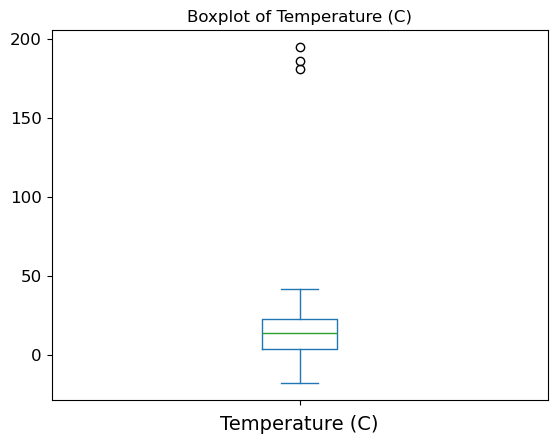

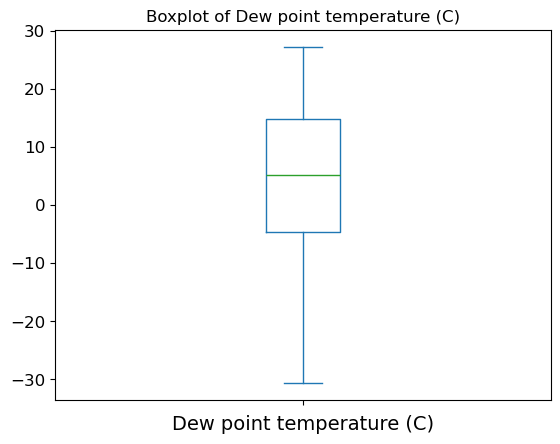

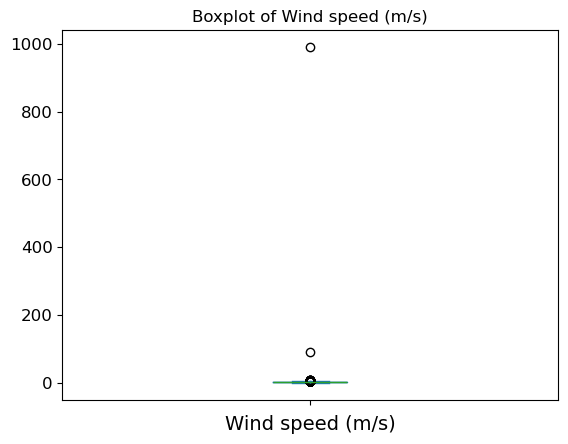

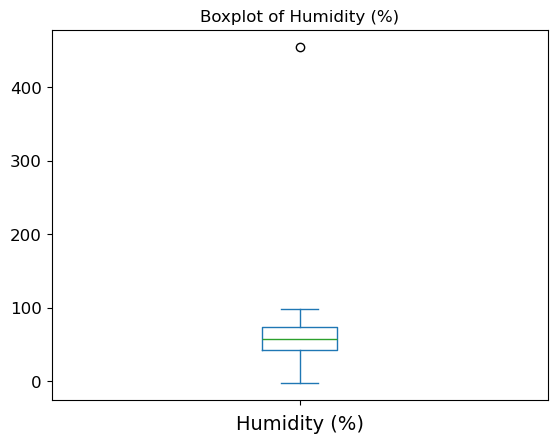

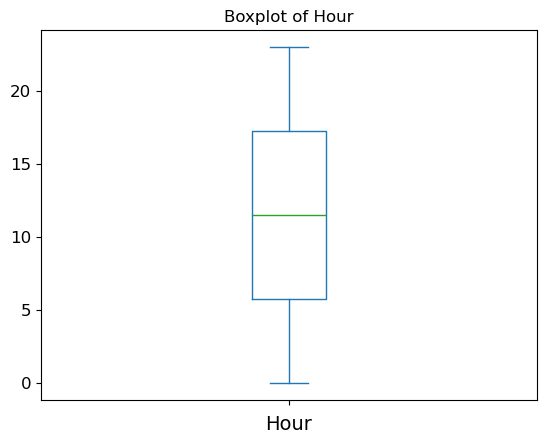

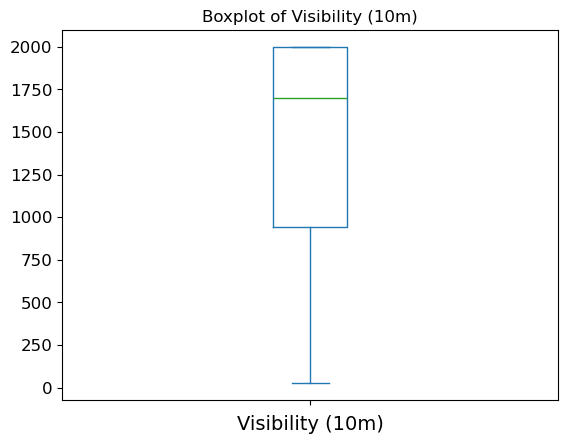

In [9]:
num_features = set(df.columns).difference(cat_features)

for feature in list(num_features):
    df[feature].plot(kind = 'box')
    plt.title(f"Boxplot of {feature}")
    plt.xlabel(feature)
    plt.xticks([1], labels = "")
    plt.show()

Show the distribution of each categorical feature using a bar plot*: 


*For this we do not consider Date, Solar Radiation, Rainfall and Snowfall as categorical features but as numerical features

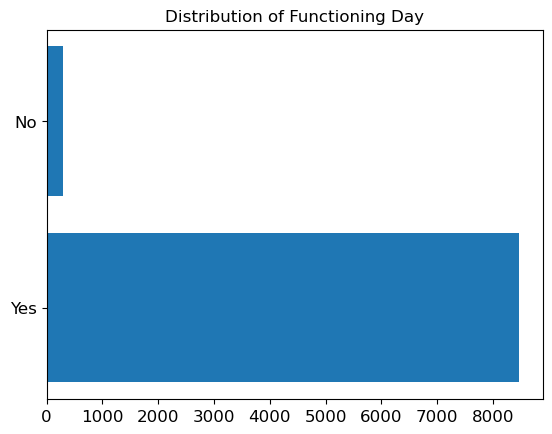

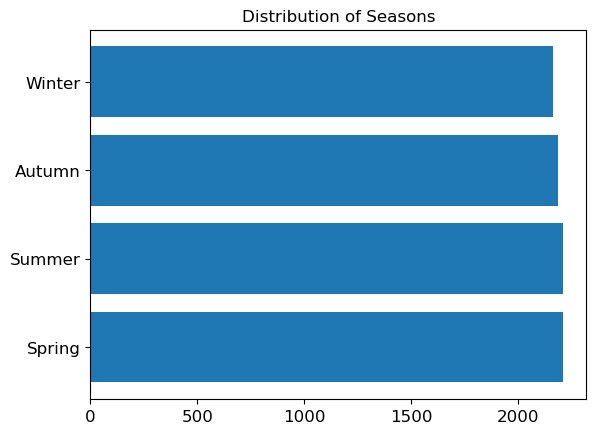

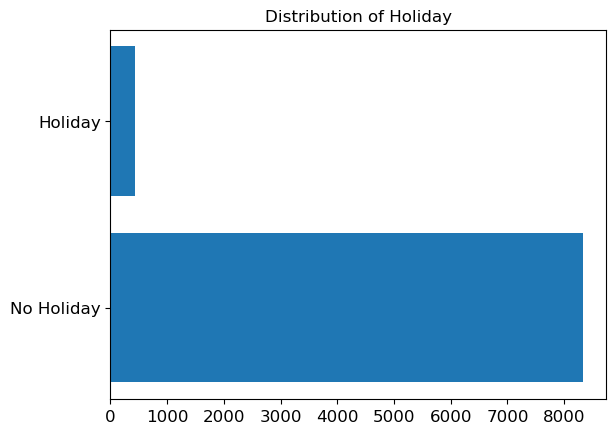

In [10]:
for feature in cat_features:
    if 'Solar Radiation' in feature or 'Rainfall' in feature or 'Snowfall' in feature or 'Date' in feature:
        continue
    counts = df[feature].value_counts()
    plt.barh(counts.index, counts.values)
    plt.title(f"Distribution of {feature}")
    plt.show()

As a caveat, we will then inpsect the data for outliers first and visualize the data again after cleaning and outlier analysis.

### Cleaning the data

Do the following to the data:
 - Using the "Functioning day" feature, **remove rows from the DataFrame** where the business is closed and then **delete the Functioning Day feature from the DataFrame**.
 - **Convert seasons to a one hot encoded format** (1 binary feature for each of the 4 seasons).
 - Replace the **Date** feature with a binary **Weekday** feature (1 for a weekday and 0 for weekend) using the code sample below or your own code.
 - **Convert remaining non-numerical features to a numerical format** or replace with NaN (i.e. `np.nan`) where not possible.
 - **Identify and fix any outliers and errors in the data**.

Save the result as a new csv file called `CleanedSeoulBikeData.csv` and **upload this** to MyUni along with this notebook when you submit your assignment.

In [11]:
## Example code for weekday feature mapping ##
# boilerplate to encode date to weekday
import datetime
def date_is_weekday(datestring):
    ### return 0 if weekend, 1 if weekday
    try: 
        dsplit = datestring.split('/')
        wday = datetime.datetime(int(dsplit[2]),int(dsplit[1]),int(dsplit[0])).weekday()
        return int(wday<=4)
    except:
        return np.nan

#### Removing days where business is closed (Functioning Day)

In [12]:
### Your code here (and remember to upload the resulting csv)
# Remove rows from the DataFame where the business is closed and then delete the Functioning Day feature 
df = df[df['Functioning Day'] == 'Yes']
df = df.drop('Functioning Day', axis = 1)
df.head(3)

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,01/12/2017,254,0,-5.2,37.0,2.2,2000,-17.6,0,0,0,Winter,No Holiday
1,01/12/2017,204,1,-5.5,38.0,0.8,2000,-17.6,0,0,0,Winter,No Holiday
2,01/12/2017,173,2,-6.0,39.0,1.0,2000,-17.7,0,0,0,Winter,No Holiday


#### Convert Seasons to OHE format

In [13]:
df['Seasons'].value_counts()

Seasons
Summer    2208
Winter    2160
Spring    2160
Autumn    1937
Name: count, dtype: int64

In [14]:
# Convert Seasons into OHE format
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
seasons_ohe = ohe.fit_transform(df['Seasons'].values.reshape(-1,1))
seasons_df = pd.DataFrame(seasons_ohe.toarray(), columns=ohe.get_feature_names_out(), dtype=int)
df = df.reset_index()
seasons_df = seasons_df.reset_index()
df = pd.concat([df, seasons_df], axis = 1)
df = df.drop(['Seasons', 'index'], axis=1)
display(df.head())

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,x0_Autumn,x0_Spring,x0_Summer,x0_Winter
0,01/12/2017,254,0,-5.2,37.0,2.2,2000,-17.6,0,0,0,No Holiday,0,0,0,1
1,01/12/2017,204,1,-5.5,38.0,0.8,2000,-17.6,0,0,0,No Holiday,0,0,0,1
2,01/12/2017,173,2,-6.0,39.0,1.0,2000,-17.7,0,0,0,No Holiday,0,0,0,1
3,01/12/2017,107,3,-6.2,40.0,0.9,2000,-17.6,0,0,0,No Holiday,0,0,0,1
4,01/12/2017,78,4,-6.0,36.0,2.3,2000,-18.6,0,0,0,No Holiday,0,0,0,1


#### Encoding Date to be a binary feature Weekday

In [15]:
#  Replace the Date feature with a binary Weekday feature (1 for a weekday and 0 for weekend) using the code sample below or your own code.
df['Weekday'] = df['Date'].apply(date_is_weekday)
df = df.drop('Date', axis=1)
display(df.head())

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,x0_Autumn,x0_Spring,x0_Summer,x0_Winter,Weekday
0,254,0,-5.2,37.0,2.2,2000,-17.6,0,0,0,No Holiday,0,0,0,1,1
1,204,1,-5.5,38.0,0.8,2000,-17.6,0,0,0,No Holiday,0,0,0,1,1
2,173,2,-6.0,39.0,1.0,2000,-17.7,0,0,0,No Holiday,0,0,0,1,1
3,107,3,-6.2,40.0,0.9,2000,-17.6,0,0,0,No Holiday,0,0,0,1,1
4,78,4,-6.0,36.0,2.3,2000,-18.6,0,0,0,No Holiday,0,0,0,1,1


#### Convert the remaining non-numeric features to numeric and replace with NaN when appropriate

In [16]:
# Convert remaining non-numerical features to a numerical format or replace with NaN (i.e. `np.nan`) where not possible
# Recall the numerical features treated as object
to_numerical = [feature for feature in cat_features if '(' in feature]
df[to_numerical] = df[to_numerical].apply(lambda x: pd.to_numeric(x, errors='coerce'))
num_features = num_features.union(set(to_numerical))
cat_features = cat_features.difference(set(to_numerical))

# convert Holiday to binary
df["Holiday"] = df["Holiday"].apply(lambda x: "1" if x == "Holiday" else 0)

#### Identify and fix the outliers

To identify outliers - we will inspect each feature and see which values are 'impossible' first in the sense that these values are physically impossible (which most likely indicates some data entry error).

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8465 non-null   int64  
 1   Hour                       8465 non-null   int64  
 2   Temperature (C)            8465 non-null   float64
 3   Humidity (%)               8465 non-null   float64
 4   Wind speed (m/s)           8465 non-null   float64
 5   Visibility (10m)           8465 non-null   int64  
 6   Dew point temperature (C)  8465 non-null   float64
 7   Solar Radiation (MJ/m2)    8464 non-null   float64
 8   Rainfall(mm)               8444 non-null   float64
 9   Snowfall (cm)              8444 non-null   float64
 10  Holiday                    8465 non-null   object 
 11  x0_Autumn                  8465 non-null   int64  
 12  x0_Spring                  8465 non-null   int64  
 13  x0_Summer                  8465 non-null   int64

##### Hour

Text(0.5, 1.0, 'Histogram of Hours')

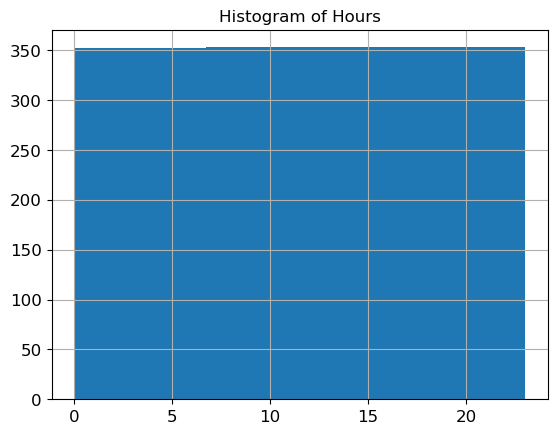

In [18]:
ax = df["Hour"].hist(bins=24)
plt.title("Histogram of Hours")

We can observe that the distribution of Hours of the transactions are uniformly distributed (where the domain of values is the hour of the day [from 0 to 23]).

##### Temperature

<Axes: xlabel='Temperature (C)'>

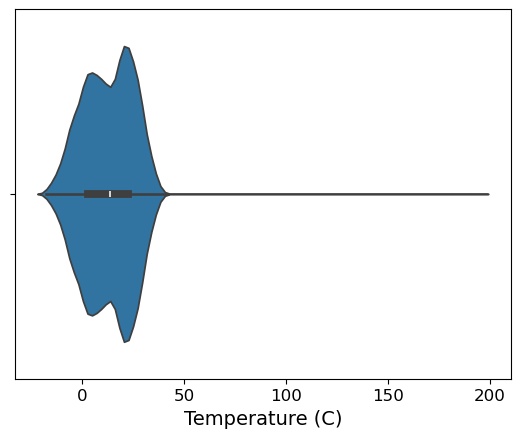

In [19]:
sns.violinplot(data=df, x="Temperature (C)")

We see that the temperature has a significant outlier outside the majority of the distribution. Inspecting the sorted data we can view this count.

In [20]:
display(df['Temperature (C)'].value_counts().sort_index(ascending=False))

Temperature (C)
 195.0    1
 186.0    1
 181.0    1
 42.0     1
 39.4     1
         ..
-16.5     1
-16.9     1
-17.4     1
-17.5     2
-17.8     1
Name: count, Length: 550, dtype: int64

To clean this data, we will remove all values above 100 degrees Celsius. The data is corroborated from the [weather historical data](https://en.wikipedia.org/wiki/Climate_of_Seoul).

In [21]:
df = df[df["Temperature (C)"] < 100]

We can now inspect the data, and see if it makes "realistic sense".

<Axes: xlabel='Temperature (C)'>

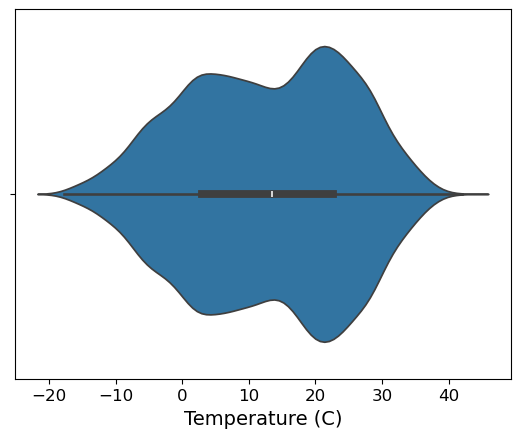

In [22]:
sns.violinplot(data=df, x="Temperature (C)")

##### Humidity

<Axes: xlabel='Humidity (%)'>

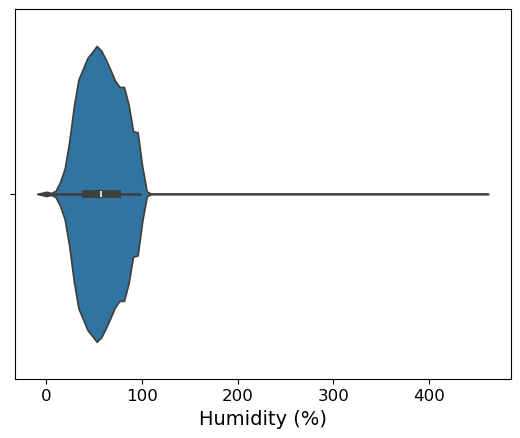

In [23]:
sns.violinplot(data=df, x="Humidity (%)")

Given the definition of humidity in the data dictionary (relative humidity), it does not make sense to have humidity outside the range of \[0, 100]. Due to this we will remove outliers outside this range and visualize the continuous distribution.

<Axes: xlabel='Humidity (%)'>

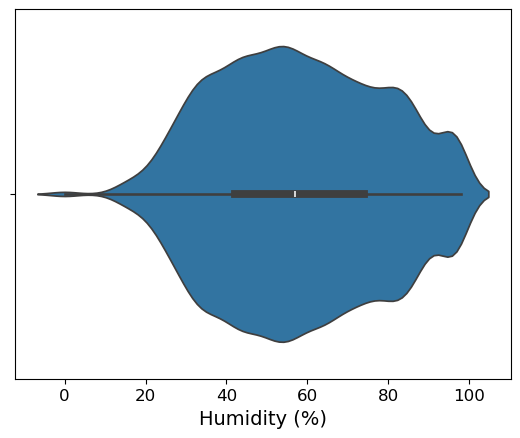

In [24]:
df = df[(0 <= df["Humidity (%)"]) & (df["Humidity (%)"] <= 100)]
sns.violinplot(data=df, x="Humidity (%)")

##### Windspeed

<Axes: xlabel='Wind speed (m/s)'>

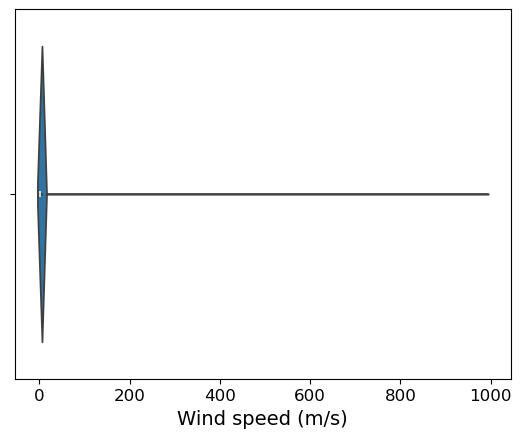

In [25]:
sns.violinplot(data=df, x="Wind speed (m/s)")

As viewed also from the the boxplot above, we see that there exists an extreme outlier for our Wind speed values. 

In [26]:
df['Wind speed (m/s)'].value_counts().sort_index(ascending=False)

Wind speed (m/s)
 991.1      1
 91.8       1
 9.2        1
 7.4        1
 7.3        1
         ... 
 0.3      149
 0.2       79
 0.1       48
 0.0       71
-0.7        1
Name: count, Length: 69, dtype: int64

Inspecting the data, I tried to verify if the data actually exists given this [source](https://www.timeanddate.com/weather/south-korea/seoul/historic?month=3&year=2018) and we see that during the date of 30/03/2018, the wind speed recorded did not actually occur. Similar to the previous feature, we will exclude negative values and remove the outliers above 90.

<Axes: xlabel='Wind speed (m/s)'>

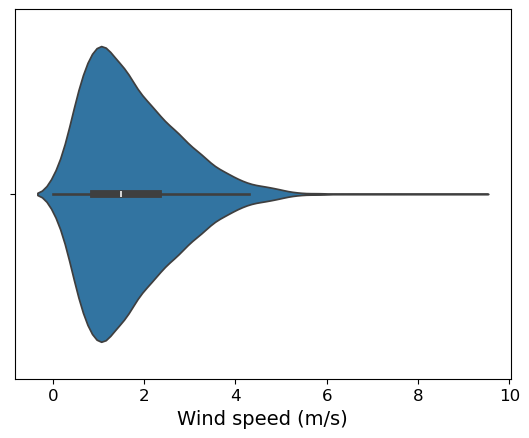

In [27]:
df = df[(0 <= df["Wind speed (m/s)"]) & (df["Wind speed (m/s)"] <= 90)]
sns.violinplot(data=df, x="Wind speed (m/s)")

##### Visibility (10m)

<Axes: xlabel='Visibility (10m)'>

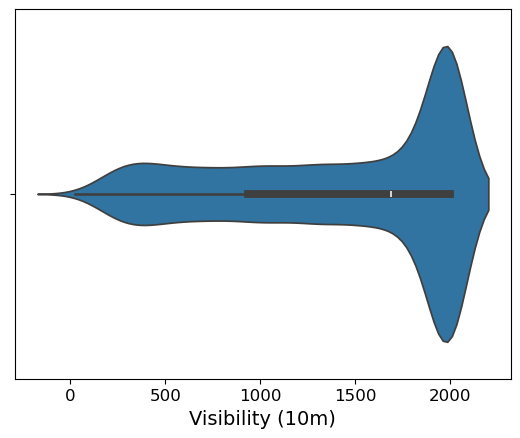

In [28]:
sns.violinplot(data=df, x="Visibility (10m)")

In [29]:
display(df["Visibility (10m)"].value_counts().sort_index(ascending=False))

Visibility (10m)
2000    2150
1999      26
1998      24
1997      21
1996      27
        ... 
53         1
38         1
34         1
33         1
27         1
Name: count, Length: 1780, dtype: int64

Given the plausability of the values, we can see that this distribution of values is realistically possible.

###### 1.2.5.6 Dew point temperature

<Axes: xlabel='Dew point temperature (C)'>

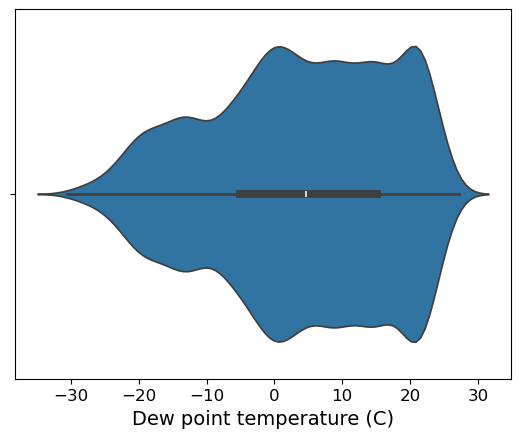

In [30]:
sns.violinplot(data=df, x="Dew point temperature (C)")

Similar to the previous feature, this distribution of values is entirely possible, and for this reason we will not remove any values.

##### Solar Radiation (MJ/m2)

<Axes: xlabel='Solar Radiation (MJ/m2)'>

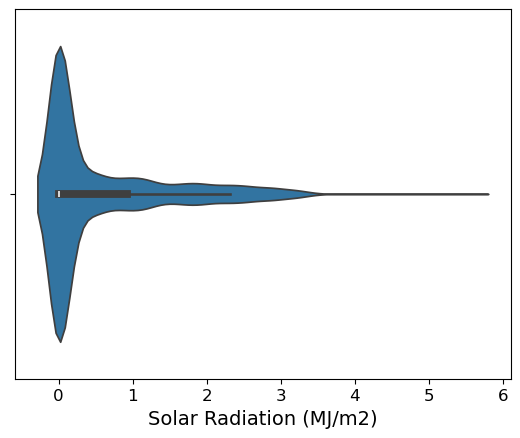

In [31]:
sns.violinplot(data=df, x="Solar Radiation (MJ/m2)")

In [32]:
display(df["Solar Radiation (MJ/m2)"].value_counts())

Solar Radiation (MJ/m2)
0.00    4145
0.01     124
0.02      78
0.03      65
0.06      61
        ... 
3.52       1
3.44       1
3.49       1
5.52       1
3.45       1
Name: count, Length: 346, dtype: int64

According to the [solar exposure map](http://www.bom.gov.au/climate/austmaps/solar-radiation-glossary.shtml), the domain of values for Solar Radiation is from 0 to 20. This distribution is entirely possible so we will also leave this feature untouched.

##### Rainfall

<Axes: xlabel='Rainfall(mm)'>

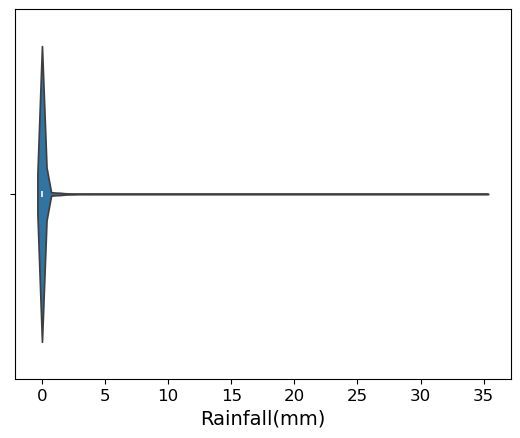

In [33]:
sns.violinplot(data=df, x="Rainfall(mm)")

In [34]:
display(df["Rainfall(mm)"].value_counts().sort_index(ascending=False))

Rainfall(mm)
35.0       1
29.5       1
24.0       1
21.5       1
21.0       1
        ... 
0.4       16
0.3        9
0.2       20
0.1       44
0.0     7920
Name: count, Length: 61, dtype: int64

According to the [Meteorological Report in Korea for 2018](https://www.kma.go.kr/download_01/Annual_Report_2018.pdf), the values inputted are reported to be within the reasonable range as reported. 

##### Snowfall

<Axes: xlabel='Snowfall (cm)'>

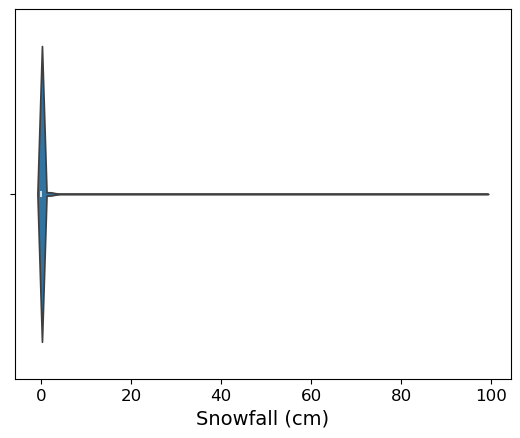

In [35]:
sns.violinplot(data=df, x="Snowfall (cm)")

For this feature, we will remove the extreme outliers namely values =< 0 and values >= 10.

<Axes: xlabel='Snowfall (cm)'>

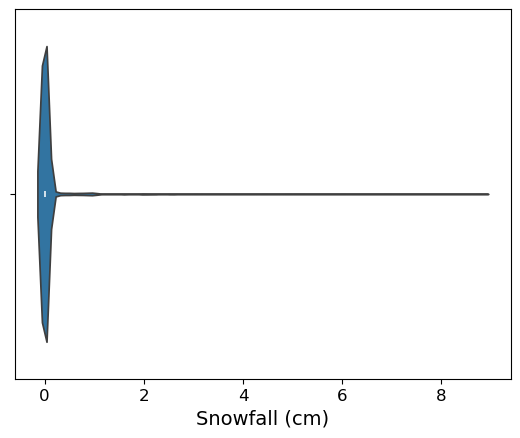

In [36]:
df = df[(0 <= df["Snowfall (cm)"]) & (df["Snowfall (cm)"] <= 90)]
sns.violinplot(data=df, x="Snowfall (cm)")

We see that the distribution of values is right skewed with most values at 0. This makes sense due to the fact that most of the year it is not snowing where it only snows, a fourth of the year.

##### Rented Bike Count

<Axes: xlabel='Rented Bike Count'>

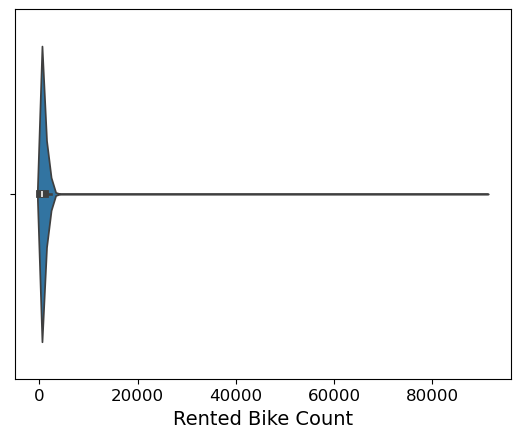

In [37]:
sns.violinplot(data=df, x="Rented Bike Count")

We can observe that the data is skewed to the right given the an extreme outlier.

In [38]:
display(df['Rented Bike Count'].value_counts().sort_index(ascending=False))

Rented Bike Count
90997    1
3556     1
3418     1
3404     1
3384     1
        ..
6        3
5        3
4        5
3        2
2        3
Name: count, Length: 2166, dtype: int64

It can be observed that a Rented Bike Count of 90997 is greater than the next smallest value by a factor of 30, the presence of this observation can greatly impact our forecasts, and for this reason, we will drop this.

In [39]:
df = df[df["Rented Bike Count"] < 4000]

<Axes: xlabel='Rented Bike Count'>

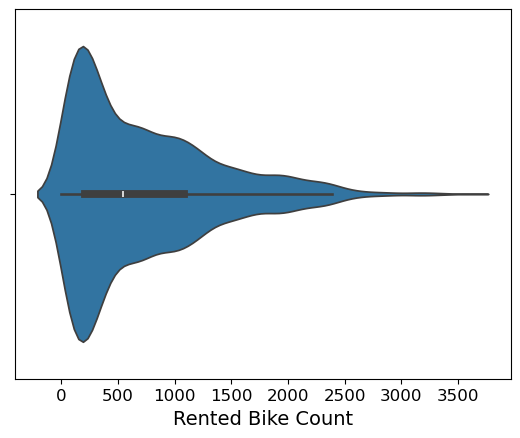

In [40]:
sns.violinplot(data=df, x="Rented Bike Count")

### Export the cleaned data

In [41]:
df.to_csv(os.getcwd() + r'/Assignment 1/CleanedSeoulBikeData.csv')

## Pre-process the data and perform the first fit (20%)

### Imputation and Pre-Processing

Make sure that you have set any problematic values in the numerical data to `np.nan` and then write code for a **sklearn *pipeline* that will perform imputation** to replace problematic entries (nan values) with an appropriate **median** value ***and* do any other pre-processing** that you think should be used.

In [42]:
df.isna().sum()

Rented Bike Count            0
Hour                         0
Temperature (C)              0
Humidity (%)                 0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature (C)    0
Solar Radiation (MJ/m2)      1
Rainfall(mm)                 0
Snowfall (cm)                0
Holiday                      0
x0_Autumn                    0
x0_Spring                    0
x0_Summer                    0
x0_Winter                    0
Weekday                      0
dtype: int64

In [43]:
### Your code here
### Given that we do not want to scale our binary features, we will implement a customer scaler.
### We will implement a minmaxscaler since the distributions are not normal
### Taken from: https://stackoverflow.com/questions/37685412/avoid-scaling-binary-columns-in-sci-kit-learn-standsardscaler

class CustomScaler(BaseEstimator,TransformerMixin): 
    # note: returns the feature matrix with the binary columns ordered first  
    def __init__(self):
        self.scaler = MinMaxScaler()

    def is_binary_column(self, column):
        return set(sorted(column)) == {0.0, 1.0}
    
    def fit(self, X, y=None):
        # scaler will only fit non-binary values
        cols = X.shape[1]
        X_cont =  [X[:,col] for col in range(cols) if not(self.is_binary_column(X[:,col]))]
        X_cont = np.array(X_cont, dtype=np.float64).T
        self.scaler.fit(X_cont, y)
        return self

    def transform(self, X):
        # Data will concatenate the continuous and binary values
        # But only the continuous values will be scaled
        cols = X.shape[1]
        X_cont =  [X[:,col] for col in range(cols) if not(self.is_binary_column(X[:,col]))]
        X_cont = np.array(X_cont, dtype=np.float64).T
        X_cont_transformed = self.scaler.transform(X_cont)
        X_bin =  [X[:,col] for col in range(cols) if self.is_binary_column(X[:,col])]
        X_bin  = np.array(X_bin, dtype=np.float64).T
        return np.concatenate((X_cont_transformed, X_bin), axis = 1) if X_bin.shape[0] * X_bin.shape[1] != 0 else X_cont_transformed

preprocessing_pipeline = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy="median")),
    # ('scaler', StandardScaler())
    ('scaler', CustomScaler())
])

### Predicting bike rentals

A regression approach will be used for this problem: that is, "bike rentals" will be treated as a real number whose value will be predicted. If necessary, it could be rounded to the nearest integer afterwards, but this will not be necessary here. The root mean squared error (RMSE) metric will be used to quantify performance.  

**Split the data** appropriately so that 20% of it will be kept as a hold-out test set. **Using the pipeline** you wrote above, pre-process and fit a ***linear regression* model** to the data in an appropriate way. After this, **calculate and print the RMSE of the fit to the training data**. 

To act as a simple baseline for comparison purposes, **also calculate and print the RMSE** that you would get if _all_ the predictions were set to be the **mean of the training targets** (i.e. bike rentals).

In [44]:
### Your code and outputs here
# Split the data into test and hold-out
y = df["Rented Bike Count"]
X = df.iloc[:,1:]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# Create the pipeline 
pipeline = Pipeline(steps = [
    ('preprocessing', preprocessing_pipeline),
    ('lr', LinearRegression())
])

# Fit the model on training data
pipeline.fit(X_train,y_train)

# Calculate RMSE of training data
y_train_pred = pipeline.predict(X_train)
train_rmse = root_mean_squared_error(y_train, y_train_pred)

# Calculate RMSE on benchmark
base_pred = np.full_like(y_train, np.mean(y_train))
bench_rmse = root_mean_squared_error(y_train, base_pred)

print(f"Training RMSE: {train_rmse}")
print(f"Benchmark RMSE: {bench_rmse}")

Training RMSE: 432.43120574530946
Benchmark RMSE: 640.0470046017047


## Hyper-parameter optimisation (30%)

**Use ChatGPT** (along with any modifications that you require) to create and run code (using sklearn pipelines) that will do the following:
 - fit a **linear regression** and a **Support Vector Regression** method to the data using **10-fold cross validation** for each model
 - display the **mean and standard deviation** of the **RMSE values** for each model (at baseline) in the _appropriate datasets_
 - perform a **hyper-parameter optimisation** on each model using **GridSearch**
 - display the **mean and standard deviation** of the **RMSE values** for each model (after optimisation) in the _appropriate datasets_
 - choose the **best model** and **visualise the results** with a single graphic of your choice

**Display the ChatGPT prompt** and the **code**, _including any fixes_ that you needed to make to get the code to work, along with the **outputs** obtained by running the code.


### GPT Prompt For Baseline 

"Given a preprocessing pipeline object in sklearn, write me a code that extends the pipeline with linear regression regressor and have 10-fold cross validation"

In [45]:
from sklearn.model_selection import cross_val_score

# Baseline
lr_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('lr', LinearRegression())
])

lr_cv_scores = cross_val_score(lr_pipeline, X_train, y_train, scoring='neg_mean_squared_error', cv = 10, n_jobs=-1)
lr_cv_scores = np.sqrt(np.abs(lr_cv_scores))
print("Baseline Model:")
print("------------------------")
print("Linear Regression RMSEs: ", lr_cv_scores)
print("Linear Regression RMSEs mean: ", np.mean(lr_cv_scores))
print("Linear Regression RMSEs std: ", np.std(lr_cv_scores))

svr_pipeline = lr_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('sv', SVR())
])
print()
svr_cv_scores = cross_val_score(svr_pipeline, X_train, y_train, scoring='neg_mean_squared_error', cv = 10, n_jobs=-1)
svr_cv_scores = np.sqrt(np.abs(svr_cv_scores))
print("Support Vector Regression RMSEs: ", svr_cv_scores)
print("Support Vector RMSEs mean: ", np.mean(svr_cv_scores))
print("Support Vector RMSEs std: ", np.std(svr_cv_scores))

Baseline Model:
------------------------
Linear Regression RMSEs:  [426.81949989 421.04450623 403.13954389 463.02975066 458.54267219
 419.52173298 435.70059037 425.93432819 426.51723938 450.9800694 ]
Linear Regression RMSEs mean:  433.12299331978255
Linear Regression RMSEs std:  17.975070723271877

Support Vector Regression RMSEs:  [533.83407693 508.8609707  515.39242302 597.86477047 584.68171006
 533.134452   549.41374725 551.6461647  548.00810301 572.66414844]
Support Vector RMSEs mean:  549.5500566590055
Support Vector RMSEs std:  27.291767070967648


### GPT Prompt For Baseline 

Recall that we do not have hyperparameters for linear regression. We can consider l1 or l2 regularization, but that would be for an aside as extra work for future exploration. (Refer to the dicussion board that explicitly says to not use hyperparameter tuning for LR 😊)

"Do gridsearch CV on this pipeline:
svr_pipeline = lr_pipeline = Pipeline([
('preprocessing', preprocessing_pipeline),
('sv', SVR())
])"

In [46]:
### Code here (with outputs)
# define parameter grid
param_grid = {
    'sv__C': [0.1, 1, 10, 100],
    'sv__kernel': ['rbf', 'linear', 'poly'],
    'sv__gamma': ['scale', 'auto', 0.1, 1],
    'sv__degree': [2,3,4],
}

In [47]:
# define GridSearch object
grid_search = GridSearchCV(
    svr_pipeline,
    param_grid,
    cv=10,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1  
)

grid_search.fit(X_train, y_train)


Fitting 10 folds for each of 144 candidates, totalling 1440 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessing',
                                        Pipeline(steps=[('imputer',
                                                         SimpleImputer(strategy='median')),
                                                        ('scaler',
                                                         CustomScaler())])),
                                       ('sv', SVR())]),
             n_jobs=-1,
             param_grid={'sv__C': [0.1, 1, 10, 100], 'sv__degree': [2, 3, 4],
                         'sv__gamma': ['scale', 'auto', 0.1, 1],
                         'sv__kernel': ['rbf', 'linear', 'poly']},
             scoring='neg_mean_squared_error', verbose=1)

In [48]:
svr_best = grid_search.best_estimator_
svr_best_scores = cross_val_score(svr_best, X_train, y_train, scoring='neg_mean_squared_error', cv = 10, n_jobs=-1)


In [49]:
svr_best_scores = np.sqrt(np.abs(svr_best_scores))
print("Support Vector Regression RMSEs: ", svr_best_scores)
print("Support Vector RMSEs mean: ", np.mean(svr_best_scores))
print("Support Vector RMSEs std: ", np.std(svr_best_scores))

Support Vector Regression RMSEs:  [307.87099645 287.02352417 266.91153577 308.28118799 321.94998095
 288.09081568 307.07568282 311.12418851 294.23256927 332.94335595]
Support Vector RMSEs mean:  302.55038375551874
Support Vector RMSEs std:  18.01303035949949


We can observe that the SVR with hyperparamter tuning outperformed all our benchmark models. What's left is to evaluate the model with the y_test and present a visualization of the results.

In [50]:
# Check for the test RMSE
sv_predictions = svr_best.predict(X_test)
test_rmse = root_mean_squared_error(y_test, sv_predictions)
print("Test RMSE: ", test_rmse)

Test RMSE:  316.1977558335902


### Visualization of Predictions

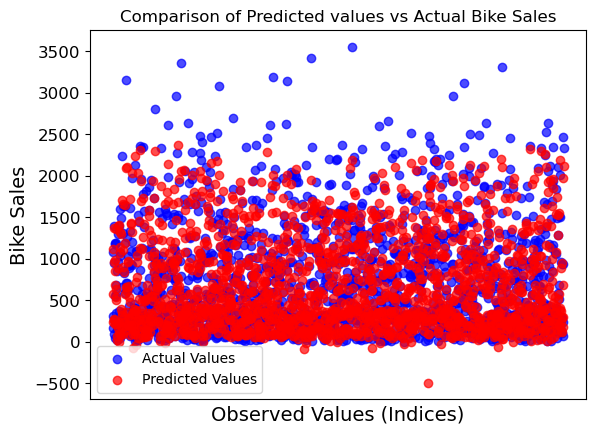

In [51]:
# Make a 2D plot to visualize the effectiveness of model
# Referencing from this website: https://stackoverflow.com/questions/65539013/how-to-plot-a-graph-of-actual-vs-predict-values-in
def plotGraph(y_test,y_pred,title):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    b  = plt.scatter(range(len(y_test)), y_test, color='blue', alpha = 0.7)
    r = plt.scatter(range(len(y_pred)), y_pred, color='red', alpha = 0.7)
    plt.legend((b,r), ('Actual Values', 'Predicted Values'))
    plt.ylabel("Bike Sales")
    plt.xlabel("Observed Values (Indices)")
    plt.xticks([])
    plt.title(title)
    plt.show()
    return

plotGraph(y_test,sv_predictions, "Comparison of Predicted values vs Actual Bike Sales")

We remark that the X-axis pertains to the index or the entry row of the value in the dataset, but remember that it was shuffled meaning no meaning information is derived from this.

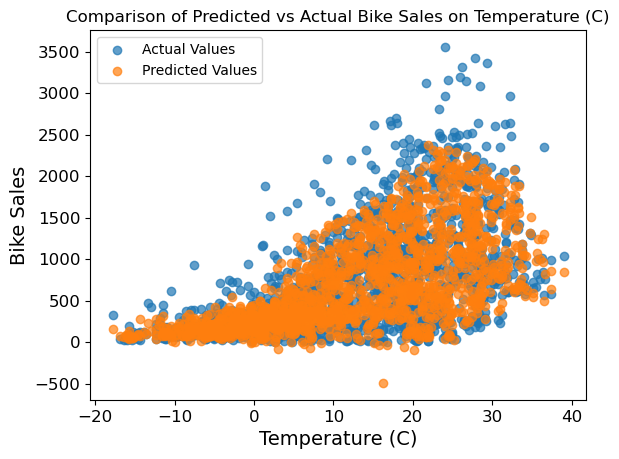

In [52]:
b  = plt.scatter(X_test['Temperature (C)'], y_test, alpha = 0.7)
r = plt.scatter(X_test['Temperature (C)'], sv_predictions, alpha = 0.7)
plt.legend((b,r), ('Actual Values', 'Predicted Values'))
plt.ylabel("Bike Sales")
plt.xlabel("Temperature (C)")
plt.title("Comparison of Predicted vs Actual Bike Sales on Temperature (C)")
plt.show()

## Step 4: Further improvements (10%)

Consider the code that you obtained from ChatGPT above and find one error, or one thing that could be improved, or one reasonable alternative (even if it might not necessarily lead to an improvement).  **Describe this error/improvement/alternative in the box below.**

### Your answer here (maximum of 200 words)
In my code, I used Perplexity AI to help me make use of boiler-plate code. It was helpful in guiding me towards the right way with how I should write my code. Additioanlly, it pointed me towards what documentation to read and reference as well in its answers. One point of improvement is how it mentioned that it was going to use `LinearRegression()` in its `GridSearchCV`, but it outputted code for a Ridge regression. While helpful, it is not necessarily within scope for this assignment, and this will be left for further consideration in the future. However, given the results of vanilla linear regression, regularization might not necessarily yield to better results given a RMSE value of around 400. For future consideration, I would've probably also prompted the LLM to consider feature importance and possibly dimensionality reduction using PCA. Moreover, I could've also used more specific ways for novelty detection aside from a manual sanity check. Lastly, one thing that could've been explored would be the correlation between variables given that we see that not all features are independent.